<h4>Antes de empezar</h4>

In [25]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

<h1>Importar datos</h1>

In [27]:
import pandas as pd

xls = pd.ExcelFile('data/Y2015_33010.xlsx')
df = xls.parse('Y2015_33010', skiprows=4, index_col=None, na_values=['NaN'])
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [28]:
df.head()

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
0,CARDIOVASCULAR,33010.0,80S,NaN,0.00,0.00
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88
3,CARDIOVASCULAR,33011.0,80S,NaN,0.00,0.00
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49


<h1>Preprocesamiento de datos</h1>
<h3>1. Limpieza de datos</h3>

In [29]:
df = df[df['MODIFIER'] == 'TOTAL'].fillna(df.median())

In [30]:
df.head()

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22
14,CARDIOVASCULAR,33025.0,TOTAL,6653.0,4070839.95,3162574.29


In [31]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
count,5629.000000,5.629000e+03,5.629000e+03,5.629000e+03
mean,39669.108545,3.059573e+04,3.970097e+06,3.052435e+06
std,15932.895303,7.572276e+05,3.478640e+07,2.683277e+07
min,10021.000000,1.100000e+01,0.000000e+00,0.000000e+00
25%,27140.000000,1.310000e+02,3.283799e+04,2.554591e+04
50%,36002.000000,3.740000e+02,1.810510e+05,1.395380e+05
75%,52442.000000,2.470000e+03,1.016475e+06,7.790881e+05
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09


In [32]:
df.shape

(5629, 6)

<h3>2. Analizar transformaciones de variables</h3>

In [33]:
df['AVERAGE ALLOWED CHARGES'] = df['ALLOWED CHARGES'] / df['ALLOWED SERVICES']
df['AVERAGE PAYMENT'] = df['PAYMENT'] / df['ALLOWED SERVICES']

In [34]:
df.head()

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88,109.226581,84.686639
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49,113.704405,88.458214
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81,485.161024,378.145180
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22,613.800519,471.456370
14,CARDIOVASCULAR,33025.0,TOTAL,6653.0,4070839.95,3162574.29,611.880347,475.360633


In [35]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
count,5629.000000,5.629000e+03,5.629000e+03,5.629000e+03,5629.000000,5629.000000
mean,39669.108545,3.059573e+04,3.970097e+06,3.052435e+06,564.502633,437.791569
std,15932.895303,7.572276e+05,3.478640e+07,2.683277e+07,549.277529,427.770615
min,10021.000000,1.100000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27140.000000,1.310000e+02,3.283799e+04,2.554591e+04,179.479758,137.191154
50%,36002.000000,3.740000e+02,1.810510e+05,1.395380e+05,436.156290,337.738790
75%,52442.000000,2.470000e+03,1.016475e+06,7.790881e+05,776.221376,603.551385
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09,8460.605567,6591.287453


In [36]:
df.shape

(5629, 8)

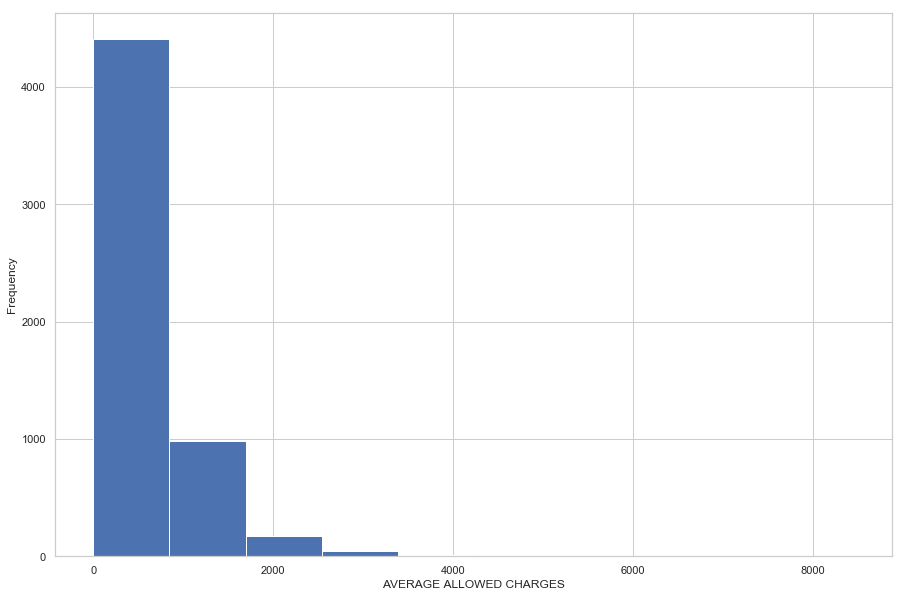

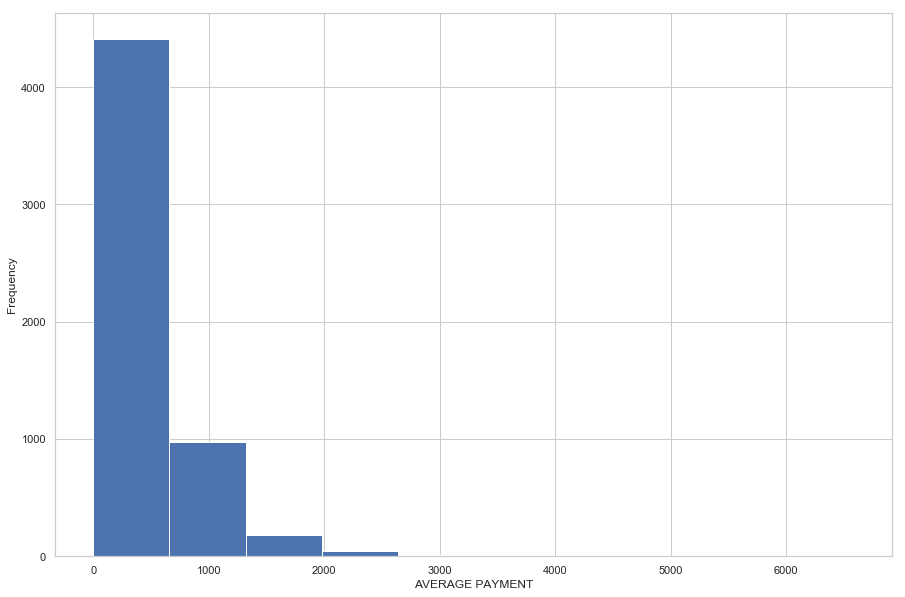

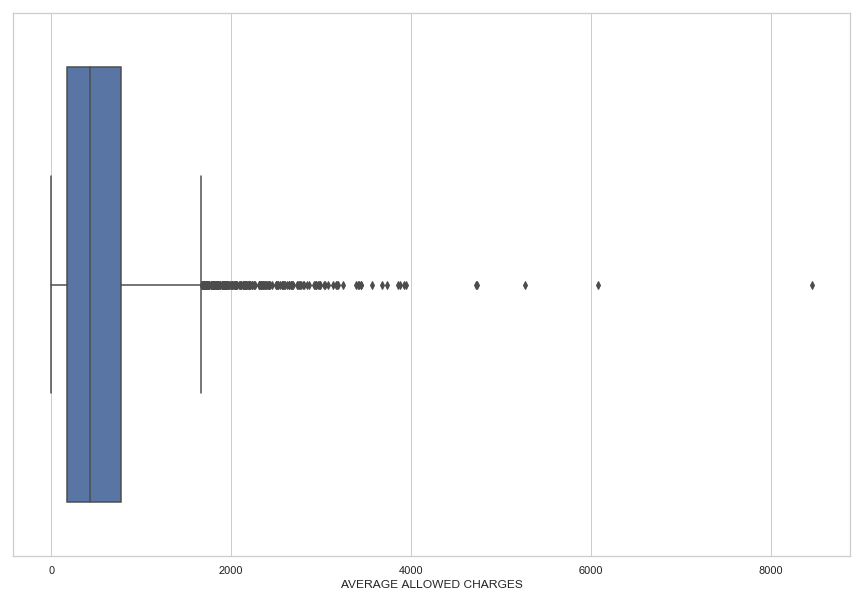

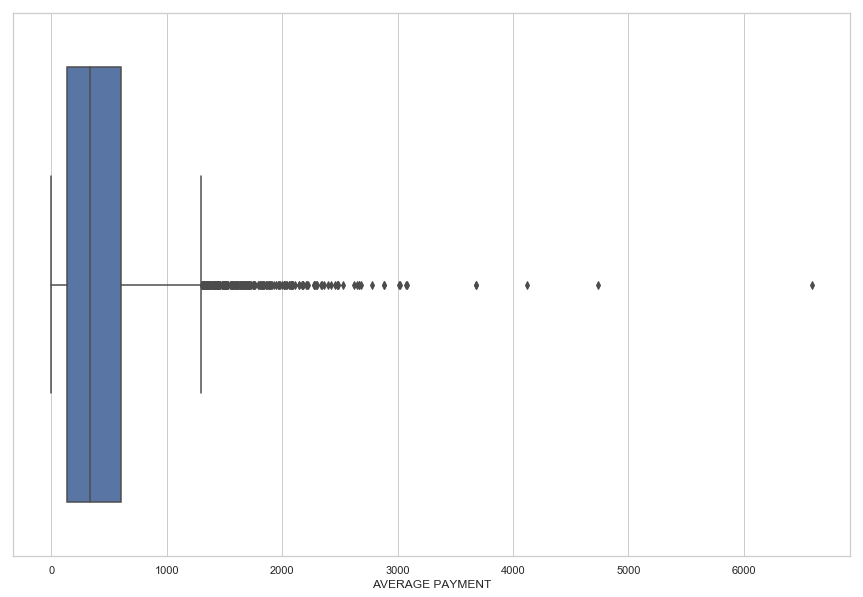

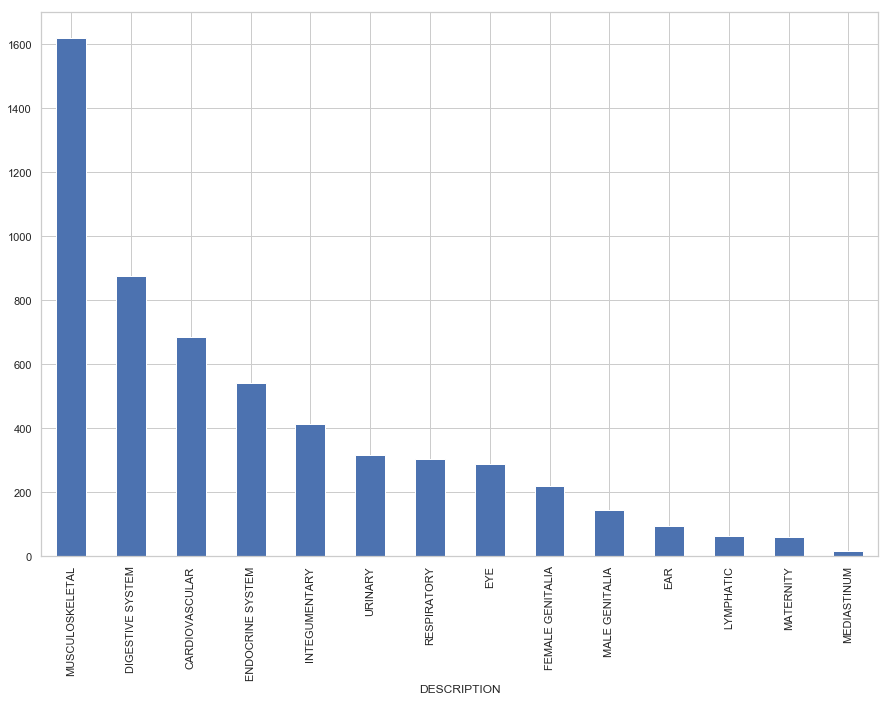

In [37]:
import seaborn as sns

df['AVERAGE ALLOWED CHARGES'].plot(kind='hist')
plt.xlabel('AVERAGE ALLOWED CHARGES')
plt.show()

df['AVERAGE PAYMENT'].plot(kind='hist')
plt.xlabel('AVERAGE PAYMENT')
plt.show()

sns.set(style='whitegrid')
ax_aac = sns.boxplot(x=df['AVERAGE ALLOWED CHARGES'])
plt.show()

sns.set(style='whitegrid')
ax_ap = sns.boxplot(x=df['AVERAGE PAYMENT'])
plt.show()

df['DESCRIPTION'].value_counts().plot(kind='bar')
plt.xlabel('DESCRIPTION')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFB364BC88>,
      dtype=object)

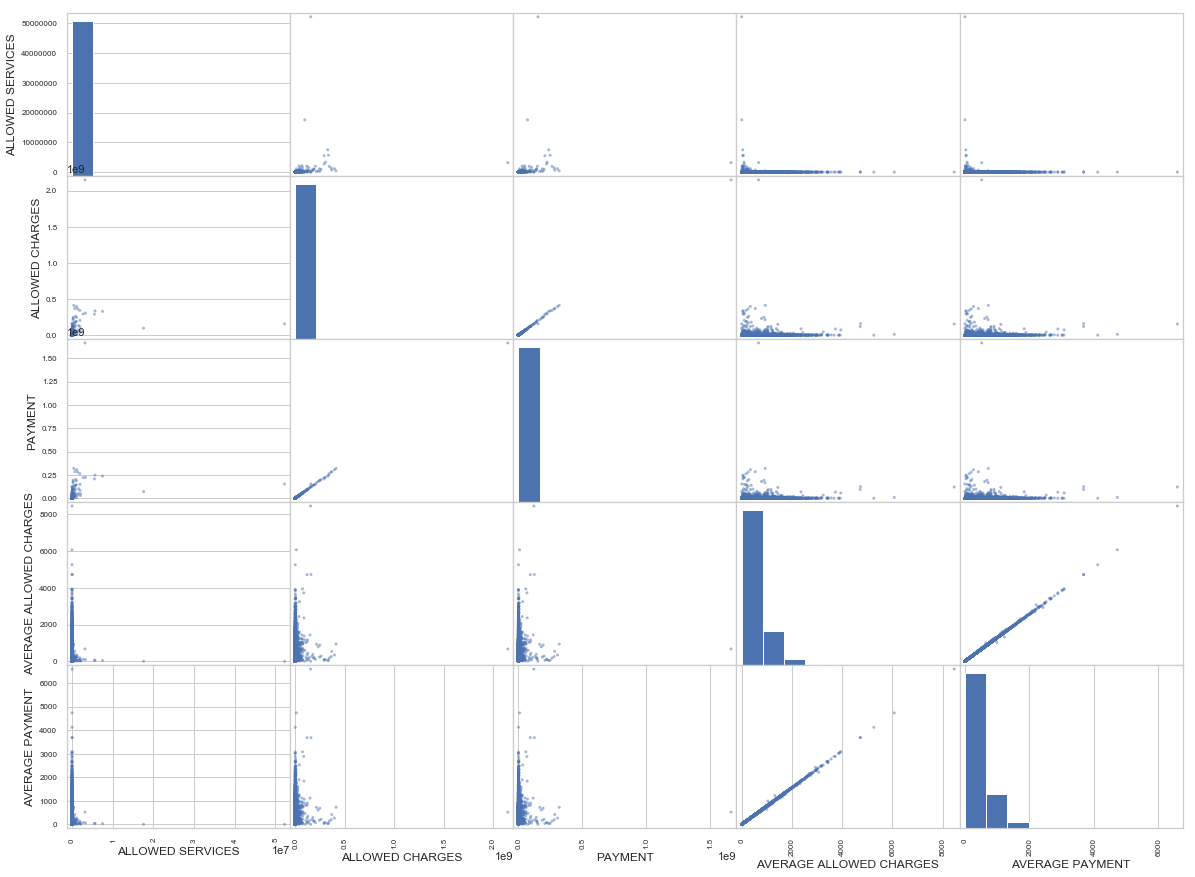

In [38]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.drop("HCPCS", axis=1), figsize=(20, 15))

<h4>Aplicar una transformacion no lineal a las variables</h4>

In [39]:
import numpy as np

df['AVERAGE ALLOWED CHARGES'] = np.power(df['AVERAGE ALLOWED CHARGES'], 0.3)
df['AVERAGE PAYMENT'] = np.power(df['AVERAGE PAYMENT'], 0.3)
df['ALLOWED SERVICES'] = np.log(df['ALLOWED SERVICES'])
df['ALLOWED CHARGES'] = np.power(df['ALLOWED CHARGES'], 0.1)
df['PAYMENT'] = np.power(df['PAYMENT'], 0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFB3D59710>,
      dtype=object)

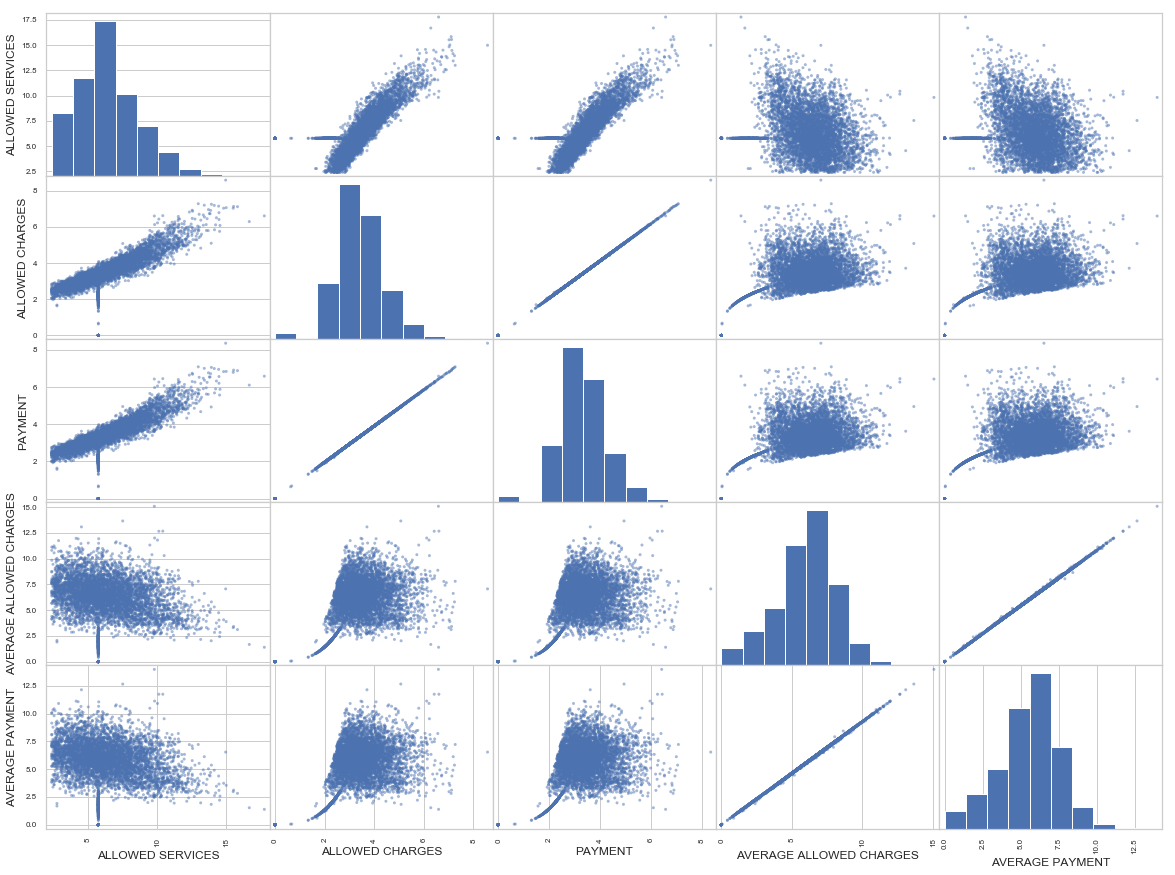

In [40]:
scatter_matrix(df.drop("HCPCS", axis=1), figsize=(20, 15))

<h4>Cambio de la variable categórica a numérica</h4>

In [41]:
one_hot = pd.get_dummies(df['DESCRIPTION'])
df = df.drop('DESCRIPTION',axis = 1)
df = df.join(one_hot)

In [42]:
df.head()

,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,CARDIOVASCULAR,DIGESTIVE SYSTEM,EAR,...,EYE,FEMALE GENITALIA,INTEGUMENTARY,LYMPHATIC,MALE GENITALIA,MATERNITY,MEDIASTINUM,MUSCULOSKELETAL,RESPIRATORY,URINARY
2,33010.0,TOTAL,8.546946,3.758564,3.664128,4.087883,3.787429,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33011.0,TOTAL,4.430817,2.500378,2.438382,4.137454,3.837262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,33015.0,TOTAL,6.932448,3.712453,3.621081,6.393899,5.933317,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,33020.0,TOTAL,5.598422,3.326129,3.239519,6.861328,6.339171,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,33025.0,TOTAL,8.802823,4.581086,4.466878,6.854881,6.354874,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,CARDIOVASCULAR,DIGESTIVE SYSTEM,EAR,ENDOCRINE SYSTEM,EYE,FEMALE GENITALIA,INTEGUMENTARY,LYMPHATIC,MALE GENITALIA,MATERNITY,MEDIASTINUM,MUSCULOSKELETAL,RESPIRATORY,URINARY
count,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000
mean,39669.108545,6.422590,3.433781,3.346185,5.951904,5.510787,0.121869,0.155267,0.016877,0.095932,0.050808,0.038728,0.073548,0.010837,0.025759,0.010304,0.002487,0.287618,0.053651,0.056316
std,15932.895303,2.256934,0.982498,0.956898,2.143781,1.991202,0.327163,0.362192,0.128822,0.294524,0.219626,0.192963,0.261057,0.103543,0.158431,0.100992,0.049813,0.452692,0.225347,0.230550
min,10021.000000,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27140.000000,4.875197,2.829031,2.758876,4.744655,4.377215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36002.000000,5.924256,3.355676,3.269409,6.192880,5.735540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52442.000000,7.811973,3.987582,3.882922,7.361998,6.826754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,69990.000000,17.771278,8.574278,8.358302,15.073720,13.985921,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df.shape

(5629, 21)

<h4>Análisis de correlación</h4>

In [45]:
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

df_numeric = df[df.columns.difference(['HCPCS', 'MODIFIER'])]

ss = StandardScaler()
df_std = pd.DataFrame(ss.fit_transform(df_numeric), columns=df_numeric.columns)

joblib.dump(ss, 'ss.joblib', compress=9)

df_corr = df_std.corr()
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,ALLOWED CHARGES,ALLOWED SERVICES,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,CARDIOVASCULAR,DIGESTIVE SYSTEM,EAR,ENDOCRINE SYSTEM,EYE,FEMALE GENITALIA,INTEGUMENTARY,LYMPHATIC,MALE GENITALIA,MATERNITY,MEDIASTINUM,MUSCULOSKELETAL,PAYMENT,RESPIRATORY,URINARY
ALLOWED CHARGES,1,0.79013,0.401975,0.400154,0.00877352,-0.0375749,-0.025251,0.0168757,0.0675498,-0.0360831,0.149928,-0.0331288,-0.080299,-0.0929888,-0.00405317,-0.0314272,0.999973,0.00651072,0.00222777
ALLOWED SERVICES,0.79013,1,-0.179475,-0.181036,0.0015597,-0.0347991,-0.0304743,-0.0118356,0.0536989,-0.0339781,0.220601,0.00627713,-0.0583586,-0.0501067,-0.011288,-0.0597083,0.789145,-0.00610651,-0.00302354
AVERAGE ALLOWED CHARGES,0.401975,-0.179475,1,0.999906,0.0321555,-0.0035809,0.0280154,0.0821785,0.0312884,-0.0287533,-0.0983099,-0.0438806,-0.0603899,-0.080335,0.00885319,0.0167837,0.403737,0.0195508,-0.0126429
AVERAGE PAYMENT,0.400154,-0.181036,0.999906,1,0.0339337,-0.0034753,0.0272236,0.0820672,0.0309734,-0.0297365,-0.0990638,-0.0433754,-0.0607288,-0.0804607,0.00909917,0.0164208,0.401997,0.0196627,-0.0121597
CARDIOVASCULAR,0.00877352,0.0015597,0.0321555,0.0339337,1,-0.159716,-0.04881,-0.121352,-0.0861901,-0.074775,-0.104964,-0.0389926,-0.0605762,-0.0380114,-0.0186018,-0.236711,0.00976408,-0.0887011,-0.0910054
DIGESTIVE SYSTEM,-0.0375749,-0.0347991,-0.0035809,-0.0034753,-0.159716,1,-0.0561724,-0.139656,-0.0991907,-0.0860538,-0.120796,-0.0448741,-0.0697133,-0.0437449,-0.0214077,-0.272415,-0.0375615,-0.10208,-0.104732
EAR,-0.025251,-0.0304743,0.0280154,0.0272236,-0.04881,-0.0561724,1,-0.0426798,-0.0303133,-0.0262985,-0.0369161,-0.0137138,-0.0213048,-0.0133687,-0.00654231,-0.0832518,-0.025593,-0.0311964,-0.0320068
ENDOCRINE SYSTEM,0.0168757,-0.0118356,0.0821785,0.0820672,-0.121352,-0.139656,-0.0426798,1,-0.0753652,-0.0653838,-0.0917812,-0.0340954,-0.0529683,-0.0332375,-0.0162656,-0.206982,0.0168891,-0.0775609,-0.0795758
EYE,0.0675498,0.0536989,0.0312884,0.0309734,-0.0861901,-0.0991907,-0.0303133,-0.0753652,1,-0.0464387,-0.0651874,-0.0242162,-0.0376206,-0.0236068,-0.0115526,-0.147008,0.0675139,-0.0550874,-0.0565186
FEMALE GENITALIA,-0.0360831,-0.0339781,-0.0287533,-0.0297365,-0.074775,-0.0860538,-0.0262985,-0.0653838,-0.0464387,1,-0.0565539,-0.021009,-0.0326381,-0.0204803,-0.0100226,-0.127538,-0.0367146,-0.0477916,-0.0490332


<h4>Aplicando PCA</h4>

<Figure size 1080x720 with 0 Axes>

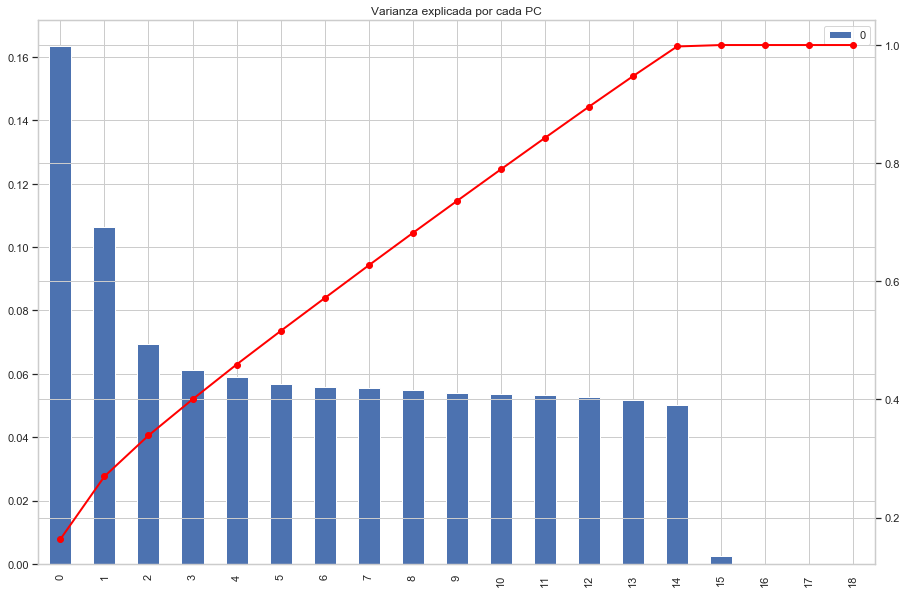

In [46]:
from sklearn.decomposition import PCA

X = df_std

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X))

joblib.dump(pca, 'pca.joblib', compress=9)

explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

fig = plt.figure()
ax = pd.DataFrame(explained_variance).plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), pd.DataFrame(cum_explained_variance).values, linestyle='-', marker='o', linewidth=2.0, color='red')
plt.title('Varianza explicada por cada PC')
plt.show()

<h1>Modelo de clasificación</h1>

In [47]:
import matplotlib.cm as cmx
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import Axes3D

def scatter3d(x, y, z, cs, title, xlabel, ylabel, zlabel, cslabel):
    cm = plt.get_cmap('jet')
    cNorm = clrs.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_label(cslabel)
    plt.show()

============Training model: knn============
Fraud: 134
No Fraud: 5495


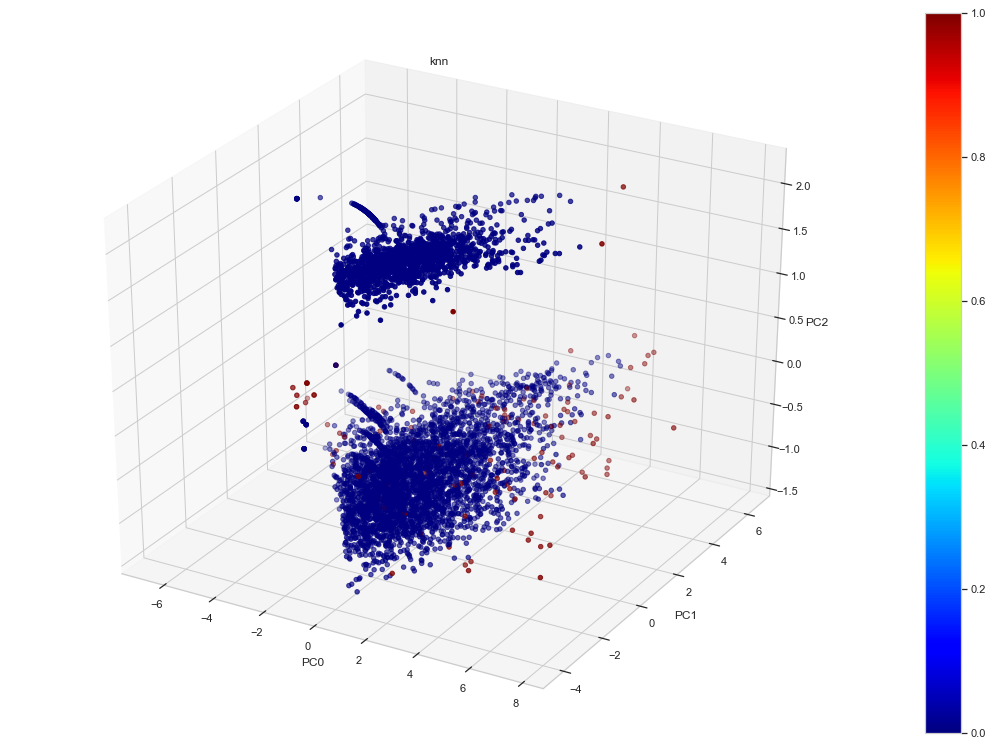

============Training model: autoencoder============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout_7 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout_8 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                200       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)        

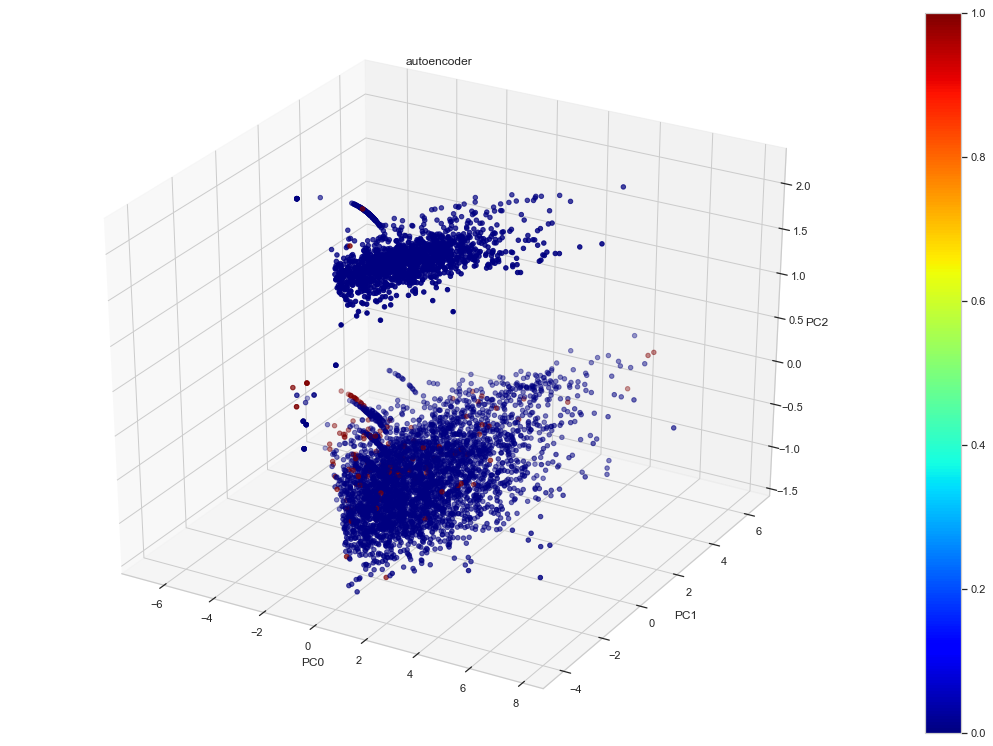

In [48]:
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_pca, test_size=0.3)

contamination = 0.025
clfs = [{'name': 'knn', 'clf': KNN(contamination=contamination)},
        {'name': 'autoencoder', 'clf': AutoEncoder(hidden_neurons=[10, 1, 1, 10],
                                                   verbose=0,
                                                   contamination=contamination)}]

for obj in clfs:
    clf_name = obj['name']
    clf = obj['clf']

    print('============Training model: ' + clf_name + '============')

    clf.fit(X_train)

    y_train_pred = clf.labels_
    y_test_pred = clf.predict(X_test)

    _df_train_class = X_train.assign(y=pd.Series(y_train_pred).values)
    _df_test_class = X_test.assign(y=pd.Series(y_test_pred).values)
    _df = pd.concat([_df_train_class, _df_test_class])

    print('Fraud:', _df[_df.y == 1]['y'].count())
    print('No Fraud:', _df[_df.y == 0]['y'].count())
    scatter3d(_df[0], _df[1], _df[2], _df['y'], clf_name, 'PC0', 'PC1', 'PC2', 'Fraud')
    
    df_results = df.join(_df['y'])
    df_results.to_csv(clf_name + '_results.csv')
    
    joblib.dump(clf, clf_name + '.joblib', compress=9)
